In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
sb.set()

In [2]:
# Import the data set
DAM_Signs = pd.read_csv('signs.csv')
DAM_Signs.head()

,Unnamed: 0,x,y,z,roll,pitch,yaw,thumb,fore,index,ring,receiver values,word
0,0,0.000000,0.000000,0.0,0.0,-1.0,-1.0,0.0,0.75,0.75,0.5,0x3F,which
1,1,0.000000,0.000000,0.0,0.0,-1.0,-1.0,0.0,0.75,0.75,0.5,0x3F,which
2,2,-0.007812,0.000000,0.0,0.0,-1.0,-1.0,0.0,0.75,0.75,0.5,0x3F,which
3,3,0.000000,0.007812,0.0,0.0,-1.0,-1.0,0.0,0.75,0.75,0.5,0x3F,which
4,4,0.000000,0.007812,0.0,0.0,-1.0,-1.0,0.0,0.75,0.75,0.5,0x3F,which


In [3]:
DAM_Signs = DAM_Signs.iloc[: , 1:]

In [4]:
DAM_Signs.drop("pitch", axis=1, inplace=True)
DAM_Signs.drop("yaw", axis=1, inplace=True)

In [5]:
DAM_Signs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10994 entries, 0 to 10993
Data columns (total 10 columns):
x                  10994 non-null float64
y                  10994 non-null float64
z                  10994 non-null float64
roll               10994 non-null float64
thumb              10994 non-null float64
fore               10994 non-null float64
index              10994 non-null float64
ring               10994 non-null float64
receiver values    10994 non-null object
word               10994 non-null object
dtypes: float64(8), object(2)
memory usage: 859.0+ KB


In [6]:
x = pd.DataFrame(DAM_Signs['x'])
y = pd.DataFrame(DAM_Signs['y'])
z = pd.DataFrame(DAM_Signs['z'])
roll = pd.DataFrame(DAM_Signs['roll'])
thumb = pd.DataFrame(DAM_Signs['thumb'])
fore = pd.DataFrame(DAM_Signs['fore'])
index = pd.DataFrame(DAM_Signs['index'])
ring = pd.DataFrame(DAM_Signs['ring'])
receiver_values = pd.DataFrame(DAM_Signs['receiver values'])
word = pd.DataFrame(DAM_Signs['word'])

In [7]:
# Convert categorical variables into dummy variables
from sklearn.preprocessing import OneHotEncoder
receiver_values = pd.get_dummies(receiver_values)

In [8]:
DAM_Signs = DAM_Signs.astype({"receiver values":'category', "word": 'category'})

In [9]:
DAM_Signs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10994 entries, 0 to 10993
Data columns (total 10 columns):
x                  10994 non-null float64
y                  10994 non-null float64
z                  10994 non-null float64
roll               10994 non-null float64
thumb              10994 non-null float64
fore               10994 non-null float64
index              10994 non-null float64
ring               10994 non-null float64
receiver values    10994 non-null category
word               10994 non-null category
dtypes: category(2), float64(8)
memory usage: 712.8 KB


In [10]:
DAM_Signs.head()

,x,y,z,roll,thumb,fore,index,ring,receiver values,word
0,0.000000,0.000000,0.0,0.0,0.0,0.75,0.75,0.5,0x3F,which
1,0.000000,0.000000,0.0,0.0,0.0,0.75,0.75,0.5,0x3F,which
2,-0.007812,0.000000,0.0,0.0,0.0,0.75,0.75,0.5,0x3F,which
3,0.000000,0.007812,0.0,0.0,0.0,0.75,0.75,0.5,0x3F,which
4,0.000000,0.007812,0.0,0.0,0.0,0.75,0.75,0.5,0x3F,which


# Uni Variate Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Function to calculate decision tree accuracies for individual factors
def acc_score (X):
    # Split the Dataset into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(X, word, test_size = 0.25)
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = None)  # Create the decision tree object
    dectree.fit(x_train, y_train)  
    return dectree.score(x_test, y_test)

In [12]:
score = [acc_score(x), acc_score(y), acc_score(z), acc_score(roll), acc_score(thumb), 
         acc_score(fore), acc_score(index), acc_score(ring), acc_score(receiver_values)]        
score_factors = pd.DataFrame(score, columns = ['Accuracy Score'], 
                      index = ['x', 'y', 'z', 'roll',
                               'thumb', 'fore', 'index', 'ring',
                              'receiver_values'])
score_factors.sort_values(by = 'Accuracy Score')

,Accuracy Score
receiver_values,0.030557
roll,0.030920
fore,0.041470
index,0.043652
z,0.049109
x,0.049836
y,0.050200
thumb,0.050928
ring,0.053838


# Multivariate Decision tree

In [13]:
# Concat all the individual factors
factors2 = pd.concat([x, y, z, roll,
                       thumb, fore, index, ring,
                      receiver_values], sort = False, axis = 1)
factors2.head()

,x,y,z,roll,thumb,fore,index,ring,receiver values_ 0x0,receiver values_ 0x1,...,receiver values_ 0x38,receiver values_ 0x39,receiver values_ 0x3A,receiver values_ 0x3B,receiver values_ 0x3C,receiver values_ 0x3D,receiver values_ 0x3E,receiver values_ 0x3F,receiver values_ 0xD,receiver values_ 0xF
0,0.000000,0.000000,0.0,0.0,0.0,0.75,0.75,0.5,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.000000,0.000000,0.0,0.0,0.0,0.75,0.75,0.5,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.007812,0.000000,0.0,0.0,0.0,0.75,0.75,0.5,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.000000,0.007812,0.0,0.0,0.0,0.75,0.75,0.5,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.000000,0.007812,0.0,0.0,0.0,0.75,0.75,0.5,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
y = word
X = pd.DataFrame(factors2)
X.head()

,x,y,z,roll,thumb,fore,index,ring,receiver values_ 0x0,receiver values_ 0x1,...,receiver values_ 0x38,receiver values_ 0x39,receiver values_ 0x3A,receiver values_ 0x3B,receiver values_ 0x3C,receiver values_ 0x3D,receiver values_ 0x3E,receiver values_ 0x3F,receiver values_ 0xD,receiver values_ 0xF
0,0.000000,0.000000,0.0,0.0,0.0,0.75,0.75,0.5,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.000000,0.000000,0.0,0.0,0.0,0.75,0.75,0.5,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.007812,0.000000,0.0,0.0,0.0,0.75,0.75,0.5,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.000000,0.007812,0.0,0.0,0.0,0.75,0.75,0.5,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.000000,0.007812,0.0,0.0,0.0,0.75,0.75,0.5,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (8245, 1) (8245, 31)
Test Set  : (2749, 1) (2749, 31)


In [16]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # Create the decision tree object
# Fit Decision Tree on Train Data 
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.12359005457853245

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.11931611495089123



# Random Forest

In [18]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 bootstrap = True,
                                max_features = 'sqrt') 

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred,average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred,average = 'micro'))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.9727107337780473

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.7093488541287741



# Logistic Regression

In [20]:
# Import Logistic Regression model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
LR = LogisticRegression()
# Fit Logistic Regression on Train Data 
LR.fit(X_train,y_train.values.ravel())

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.2587022437841116

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.24772644598035648



# K-Nearest Neighbours

In [22]:
# Import KNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
KNN = KNeighborsClassifier(n_neighbors=90) # k = squareroot N, where N is the number of training data (sqrt(0.75x10994))
# Fit KNN on Train Data 
KNN.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=90, p=2,
                     weights='uniform')

In [23]:
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.41419041843541543

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3746817024372499



# Gradient Boosting

In [24]:
# Import GradientBoostingClassifier model from Scikit-Learn
from sklearn.ensemble import GradientBoostingClassifier

gradboost = GradientBoostingClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                      max_depth = 2,        # Set the maximum depth of each tree
                                      learning_rate = 0.1)  # Learning_rate shrinks the contribution of each tree   

# Fit Gradient Boosting model on Train Data
gradboost.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [25]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = gradboost.predict(X_train)
y_test_pred = gradboost.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.7275924802910855

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.6064023281193162



# XG Boost

In [26]:
# Import XGBClassifier model from Scikit-Learn
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100,     # n_estimators denote number of trees
                    max_depth = 2,          # Set the maximum depth of each tree
                    gamma=0,                # Regularization parameter: min loss reduction required to make a further partition on a leaf node of the tree
                    learning_rate = 0.1,  # Learning_rate shrinks the contribution of each tree   
                    colsample_bytree = 0.3) # Subsample ratio by number of columns when constructing each tree

# Fit XGBoost on Train Data 
xgb.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.5867798665858096

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.5198253910512913



# Support Vector Machine

In [28]:
from sklearn import svm
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set

In [29]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [30]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.3437613677700982
Accuracy Polynomial Kernel: 0.02437249909057839
Accuracy Radial Basis Kernel: 0.4365223717715533
Accuracy Sigmoid Kernel: 0.05783921425973081


# Neural Network

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.46585809581564586

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4372499090578392


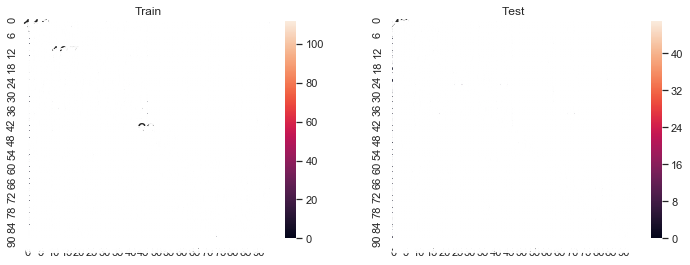

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# MLP neural network
mlp = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=600)
mlp.fit(X_train,y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", mlp.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", mlp.score(X_test, y_test))